In [51]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing ## scalling
import matplotlib.pyplot as plt
import calendar as cd

In [52]:
companis=['company'+str(i) for i in range(1,1001)]
months=[cd.month_name[i] for i in range(1,13)]
company_profit_df=pd.DataFrame(columns=months,index=companis)

In [53]:
for company in company_profit_df.index:
    company_profit_df.loc[company,'January':'June']=np.random.normal(loc=rd.randrange(10,1000),scale=100,size=6)
    company_profit_df.loc[company,'July':'December']=np.random.normal(loc=rd.randrange(10,1000),scale=100,size=6)
company_profit_df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
company1,268.648,220.166,364.647,157.518,247.644,447.77,296.014,482.942,402.305,232.176,202.474,353.567
company2,216.604,364.396,-1.97443,43.6657,136.449,177.313,317.931,395.961,299.651,307.628,527.848,359.128
company3,978.147,775.697,848.509,863.987,822.596,795.37,783.997,966.209,918.178,956.921,848.092,1042.41
company4,625.505,604.947,811.669,722.928,560.642,591.21,142.695,28.2672,85.4136,43.1602,321.707,245.514
company5,46.7827,106.941,52.6874,70.2997,27.4885,23.4074,710.698,911.764,937.537,735.59,774.4,873.62


In [54]:
scaled_company_data=preprocessing.scale(company_profit_df.T)

In [55]:
pca_obj=PCA()
pca_obj.fit(scaled_company_data)
pca_OP_data=pca_obj.transform(scaled_company_data)

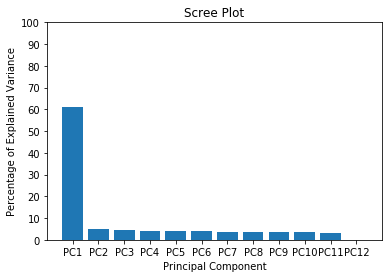

In [56]:
per_var=np.round(pca_obj.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

                 PC1        PC2        PC3        PC4        PC5        PC6  \
January    24.909742   2.068499  10.648030 -10.052998   2.276914   0.674698   
February   24.753554 -10.301766  -5.909906  -0.917868  -0.790342  -1.322184   
March      25.423215  13.334214  -1.360387   3.116951  -1.078935  -2.756020   
April      25.134290   0.258088  -7.179149  -7.608864  -0.566900   3.442424   
May        24.222984  -0.697928  -4.335700   4.979916  -3.747318   6.306473   
June       24.014710  -4.804165   8.314332  10.661748   3.736786  -6.562384   
July      -24.236202   0.194574  -2.854643   8.333827   0.475893  13.969480   
August    -24.680595  -5.490706  12.823744  -3.666666   1.086792   6.473608   
September -25.286973  13.744872   1.638818  -1.382696  -4.639304  -2.007964   
October   -24.490352  -0.266210  -8.326173  -5.685284  15.167864  -3.022867   
November  -24.971892  -6.692707  -2.912231  -4.707650 -13.962341  -6.149672   
December  -24.792480  -1.346764  -0.546735   6.92958

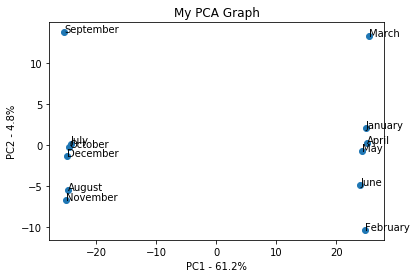

In [57]:
pca_df=pd.DataFrame(pca_OP_data,index=months,columns=labels)
print(pca_df)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [58]:
loading_scores = pd.Series(pca_obj.components_[0], index=companis)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

company226    0.040141
company718    0.040119
company506   -0.040082
company895   -0.040063
company794   -0.040020
company388   -0.040009
company535   -0.040008
company881    0.040007
company61    -0.039996
company868    0.039964
dtype: float64
